In [ ]:
!pip install kaggle

In [ ]:
!pip install pandas


In [ ]:
!pip install opendatasets

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"davidandreynugroho","key":"ae378ea2d8627f541e29cce578d5f067"}'}

In [ ]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)

# Pindahkan file kaggle.json ke direktori tersebut
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Atur izin file agar hanya bisa diakses oleh pengguna (privasi)
os.chmod('/root/.kaggle/kaggle.json', 0o600)


In [ ]:
!kaggle datasets download -d borismarjanovic/price-volume-data-for-all-us-stocks-etfs

Dataset URL: https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs
License(s): CC0-1.0
 99% 485M/492M [00:05<00:00, 85.2MB/s]
100% 492M/492M [00:05<00:00, 92.6MB/s]


In [ ]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip -d /content/dataset

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/dataset/Stocks/ergf.us.txt  
  inflating: /content/dataset/Stocks/erh.us.txt  
  inflating: /content/dataset/Stocks/eri.us.txt  
  inflating: /content/dataset/Stocks/eric.us.txt  
  inflating: /content/dataset/Stocks/erie.us.txt  
  inflating: /content/dataset/Stocks/erii.us.txt  
  inflating: /content/dataset/Stocks/erj.us.txt  
  inflating: /content/dataset/Stocks/erm.us.txt  
  inflating: /content/dataset/Stocks/ern.us.txt  
  inflating: /content/dataset/Stocks/eros.us.txt  
  inflating: /content/dataset/Stocks/eryp.us.txt  
  inflating: /content/dataset/Stocks/es.us.txt  
  inflating: /content/dataset/Stocks/esba.us.txt  
  inflating: /content/dataset/Stocks/esbk.us.txt  
  inflating: /content/dataset/Stocks/esca.us.txt  
  inflating: /content/dataset/Stocks/esdi.us.txt  
  inflating: /content/dataset/Stocks/esdiw.us.txt  
  inflating: /content/dataset/Stocks/ese.us.txt  
  inflating: /content/dataset/

In [ ]:
import os

# List the files in the extracted directory
os.listdir('/content/dataset')

['Data', 'Stocks', 'ETFs']

In [ ]:
# Open and read the first few lines of the .txt file to inspect the content
with open('/content/dataset/Stocks/nvda.us.txt', 'r') as file:
    lines = file.readlines()

# Display the first few lines
print(lines[:10])  # Adjust the number of lines displayed as needed

['Date,Open,High,Low,Close,Volume,OpenInt\n', '1999-01-22,1.6238,1.8092,1.4379,1.5215,18297633,0\n', '1999-01-25,1.6423,1.698,1.5215,1.6793,3445279,0\n', '1999-01-26,1.698,1.735,1.5311,1.5494,2320993,0\n', '1999-01-27,1.5586,1.5957,1.466,1.5494,1662658,0\n', '1999-01-28,1.5494,1.5586,1.5311,1.5401,1540110,0\n', '1999-01-29,1.5401,1.5494,1.466,1.466,1659098,0\n', '1999-02-01,1.466,1.5124,1.466,1.4938,1046355,0\n', '1999-02-02,1.466,1.5124,1.336,1.3824,1779388,0\n', '1999-02-03,1.3642,1.429,1.3546,1.4104,518004,0\n']


In [ ]:
import pandas as pd
import pandas as lag_plot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot

# Load the comma-separated file
df = pd.read_csv('/content/dataset/Stocks/nvda.us.txt', delimiter=',')

# Display the first few rows
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-01-22,1.6238,1.8092,1.4379,1.5215,18297633,0
1,1999-01-25,1.6423,1.6980,1.5215,1.6793,3445279,0
2,1999-01-26,1.6980,1.7350,1.5311,1.5494,2320993,0
3,1999-01-27,1.5586,1.5957,1.4660,1.5494,1662658,0
4,1999-01-28,1.5494,1.5586,1.5311,1.5401,1540110,0


In [ ]:
# Display the first few rows
print(df.head())
print(df.shape)
print(df.columns)

         Date    Open    High     Low   Close    Volume  OpenInt
0  1999-01-22  1.6238  1.8092  1.4379  1.5215  18297633        0
1  1999-01-25  1.6423  1.6980  1.5215  1.6793   3445279        0
2  1999-01-26  1.6980  1.7350  1.5311  1.5494   2320993        0
3  1999-01-27  1.5586  1.5957  1.4660  1.5494   1662658        0
4  1999-01-28  1.5494  1.5586  1.5311  1.5401   1540110        0
(4733, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


<Figure size 1000x600 with 0 Axes>

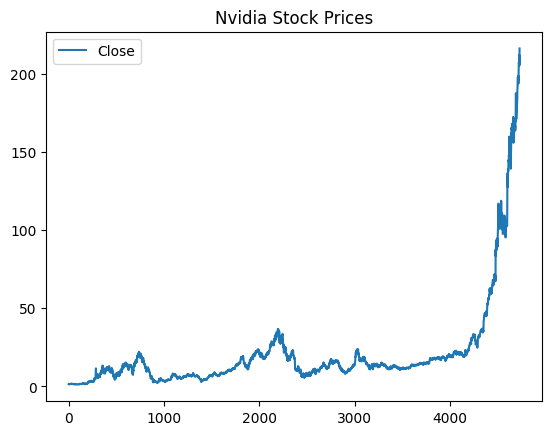

In [ ]:
plt.figure(figsize=(10, 6))
df[['Close']].plot()
plt.title("Nvidia Stock Prices")
plt.show()


Text(0.5, 1.0, 'Nvidia Cumulative Returns')

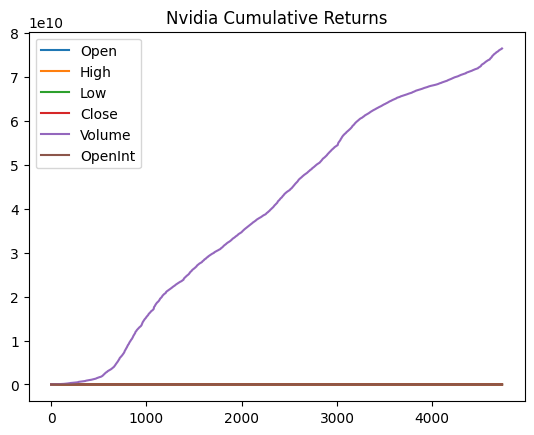

In [ ]:
dr = df.cumsum()
dr.plot()
plt.title('Nvidia Cumulative Returns')

Text(0.5, 1.0, 'Nvidia Autocorrelation plot')

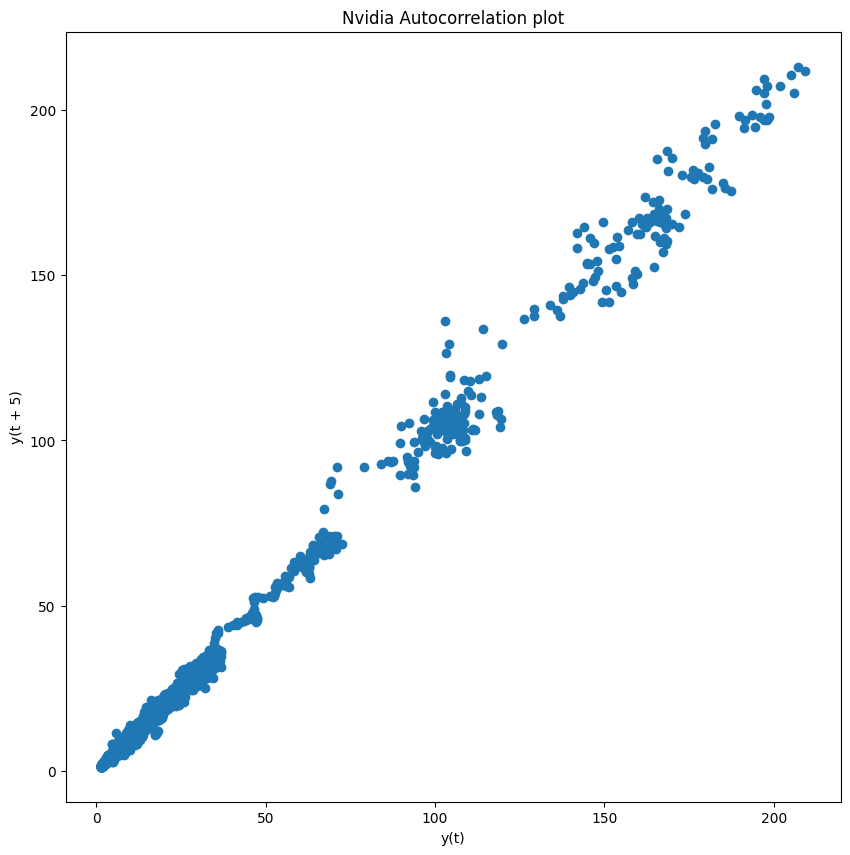

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Nvidia Autocorrelation plot')

In [ ]:
df['Date'][4701]

'2017-09-28'

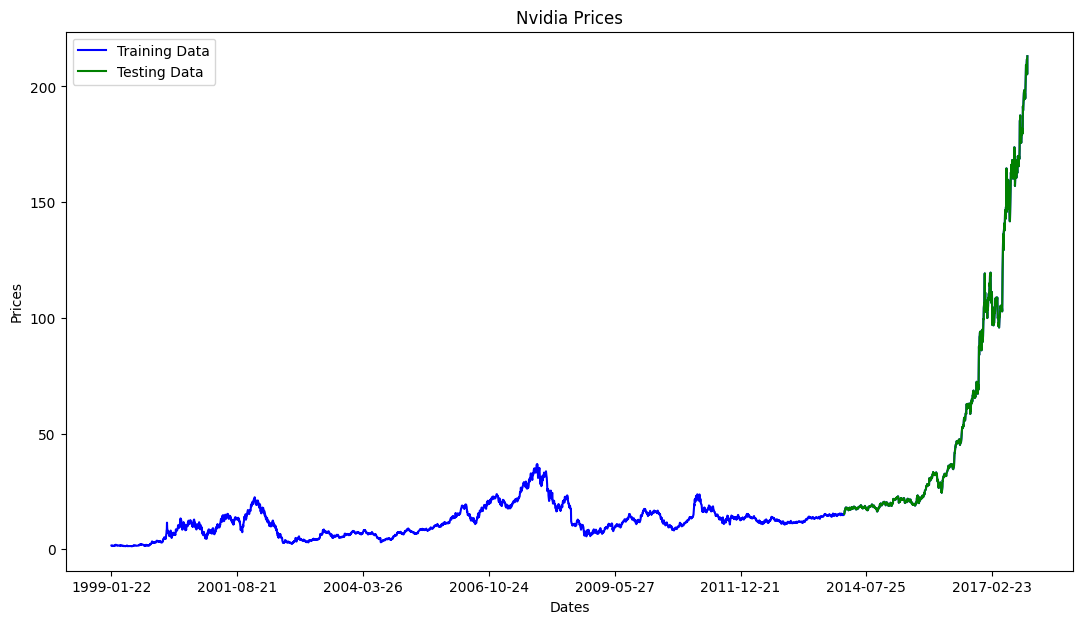

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(13,7))
plt.title('Nvidia Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,4701,650), df['Date'][0:4701:650])
plt.legend()

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 4.324
Symmetric mean absolute percentage error: 1.575


<ipython-input-18-ee1922155b1a>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Open'], 'green', color='blue', label='Training Data')


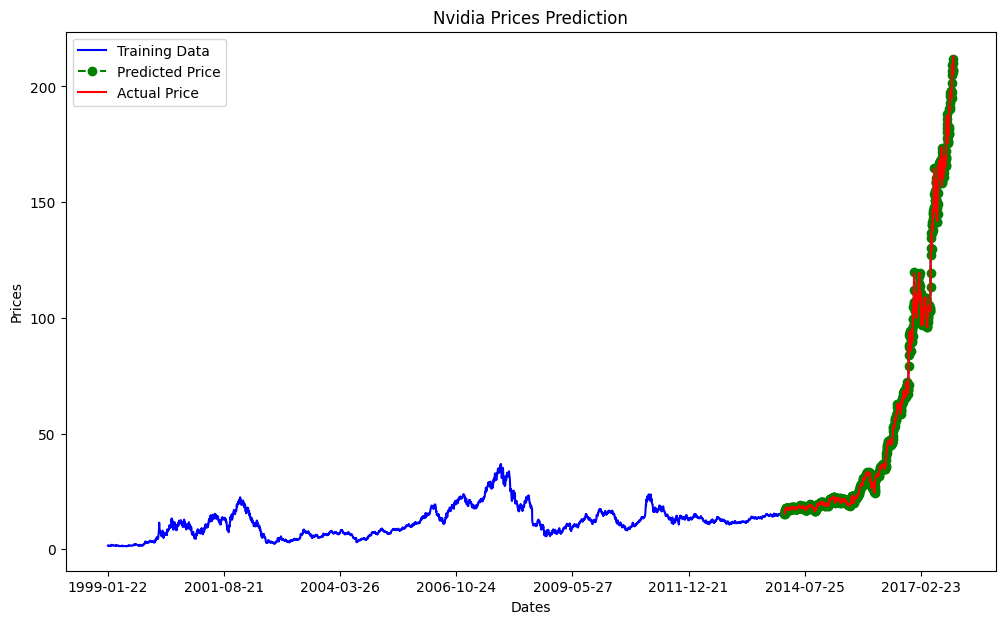

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Nvidia Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
num_ticks = 7
plt.xticks(np.arange(0,4701,650), df['Date'][0:4701:650])
plt.legend()

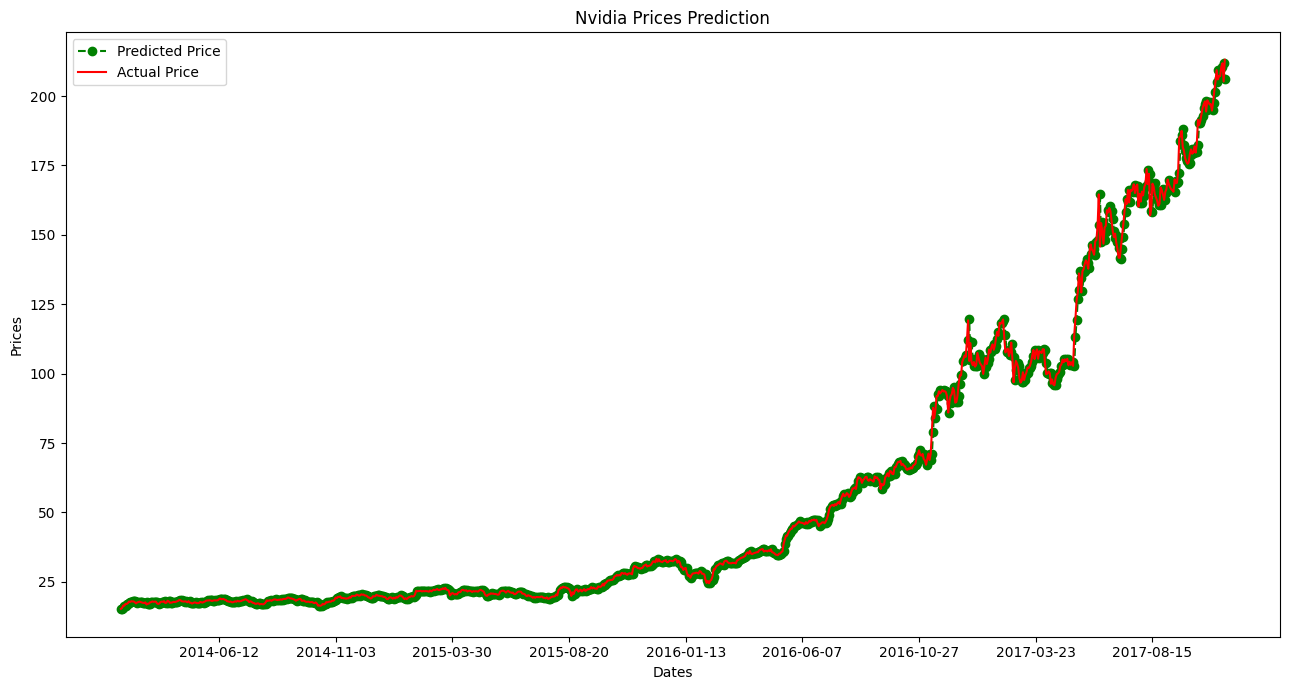

In [ ]:
plt.figure(figsize=(13,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(3870,4700, 100), df['Date'][3870:4700:100])
plt.title('Nvidia Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.tight_layout()
plt.legend()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 7.1093e-04
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 2.7724e-05
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 2.7439e-05
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 2.2409e-05
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 2.1601e-05
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 1.9730e-05
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 1.7494e-05
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 1.5520e-05
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 1.5372e-05
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 1.6056e-05
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 1.3571e-05
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 1.4097e-05
Epoch 13/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 1.4555e-05
Epoch 14/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 1.3589e-05
Epoch 15/50
59/59 ━━━━━━━━

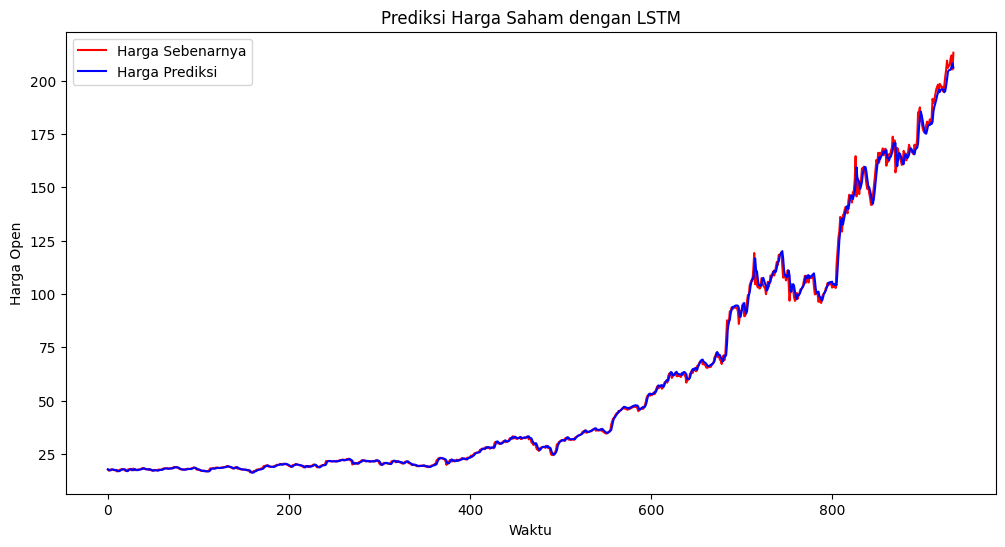

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Data Preprocessing
df = pd.read_csv('/content/dataset/Stocks/nvda.us.txt', delimiter=',')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Fokus pada kolom 'Open'
data = df[['Open']].values

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Membuat data time series
time_step = 60  # Menggunakan 60 hari sebelumnya untuk memprediksi 1 hari
X, y = [], []
for i in range(time_step, len(data_scaled)):
    X.append(data_scaled[i-time_step:i, 0])  # 60 data sebelumnya sebagai input
    y.append(data_scaled[i, 0])  # Data saat ini sebagai output
X, y = np.array(X), np.array(y)

# Reshape data menjadi [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Membagi dataset menjadi train dan test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Membuat model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, batch_size=64, epochs=50)

# 6. Prediksi data test
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Skala balik ke nilai asli
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))  # Skala balik y_test

# 7. Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, color='red', label='Harga Sebenarnya')
plt.plot(predicted, color='blue', label='Harga Prediksi')
plt.title('Prediksi Harga Saham dengan LSTM')
plt.xlabel('Waktu')
plt.ylabel('Harga Open')
plt.legend()
plt.show()

plt.tight_layout()
plt.show()


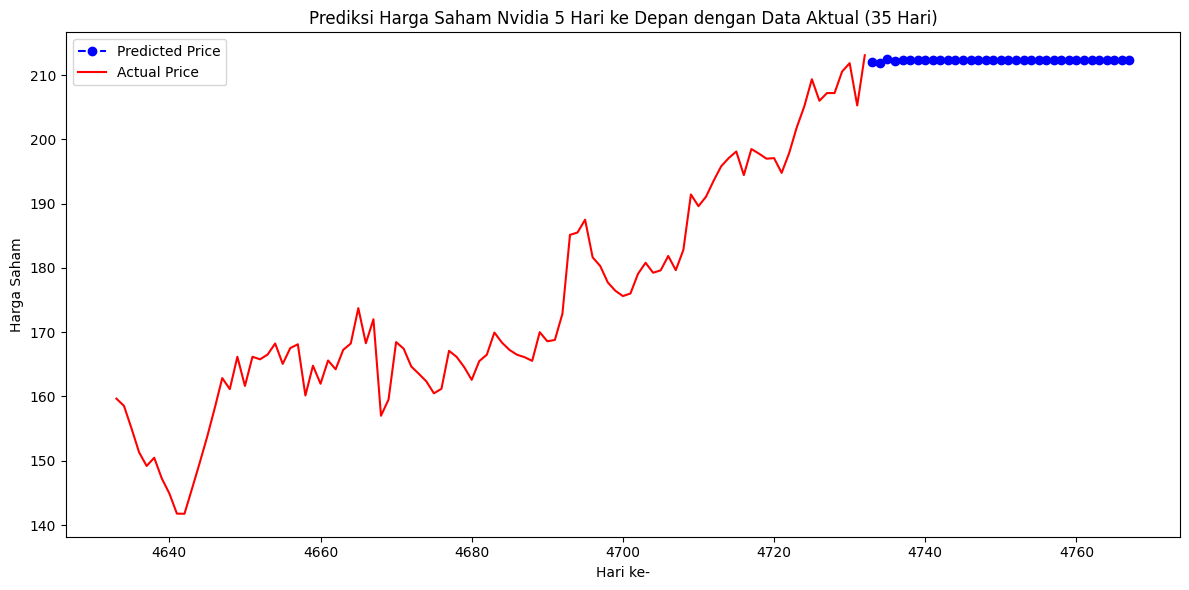

    Predicted Price
0        211.963060
1        211.934267
2        212.544145
3        212.195053
4        212.333799
5        212.337466
6        212.306800
7        212.330886
8        212.321942
9        212.322764
10       212.324558
11       212.323094
12       212.323733
13       212.323643
14       212.323551
15       212.323642
16       212.323599
17       212.323608
18       212.323612
19       212.323607
20       212.323610
21       212.323609
22       212.323609
23       212.323609
24       212.323609
25       212.323609
26       212.323609
27       212.323609
28       212.323609
29       212.323609
30       212.323609
31       212.323609
32       212.323609
33       212.323609
34       212.323609


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya df adalah DataFrame yang sudah ada dengan kolom 'Date' dan 'Open'
# df['Date'] = pd.to_datetime(df['Date'])  # Pastikan kolom 'Date' sudah dalam format datetime
# df.set_index('Date', inplace=True)

train_data = df['Open'].values

# Menyimpan data historis untuk ARIMA
history = [x for x in train_data]
predictions = list()

# Prediksi 5 hari ke depan
for t in range(35):  # Melakukan prediksi untuk 5 hari
    model = ARIMA(history, order=(5,1,0))  # Model ARIMA dengan parameter order
    model_fit = model.fit()  # Melatih model dengan data historis
    output = model_fit.forecast()  # Melakukan prediksi untuk 1 langkah ke depan
    yhat = output[0]  # Mengambil prediksi harga saham
    predictions.append(yhat)  # Menambahkan prediksi ke daftar
    history.append(yhat)  # Menambahkan prediksi ke data historis untuk iterasi berikutnya

# Mengambil data aktual dari df untuk 35 hari terakhir
actual_data = df['Open'].values[-100:]  # Mengambil 35 data terakhir (aktual)

# Visualisasi hasil prediksi dan data aktual
plt.figure(figsize=(12, 6))

# Plot prediksi (hanya 5 hari)
plt.plot(range(len(df), len(df) + 35), predictions, color='blue', marker='o', linestyle='dashed', label='Predicted Price')

# Plot data aktual (35 hari terakhir)
plt.plot(range(len(df)-100, len(df)), actual_data, color='red', label='Actual Price')

plt.title('Prediksi Harga Saham Nvidia 5 Hari ke Depan dengan Data Aktual (35 Hari)')
plt.xlabel('Hari ke-')
plt.ylabel('Harga Saham')
plt.legend()
plt.tight_layout()
plt.show()

# Menyimpan hasil prediksi untuk 5 hari
predicted_5_days = pd.DataFrame(predictions, columns=['Predicted Price'])
print(predicted_5_days)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 2.2791e-04 - val_loss: 5.2440e-04
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 2.2424e-05 - val_loss: 2.7140e-04
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 2.0295e-05 - val_loss: 2.4273e-04
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 1.6851e-05 - val_loss: 2.2223e-04
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.5847e-05 - val_loss: 7.7407e-04
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1.7732e-05 - val_loss: 2.7682e-04
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 1.3744e-05 - val_loss: 2.6102e-04
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 1.6011e-05 - val_loss: 2.0838e-04
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.3897e-05 - val_loss: 1.7888e-04
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 1.1276e-05 - val_loss: 3.0657e-04
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2816e-05
Lo

<ipython-input-72-ceeaae90c3fb>:64: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=len(future_predictions) + 1, freq='A')[1:]  # 'A' untuk tahunan


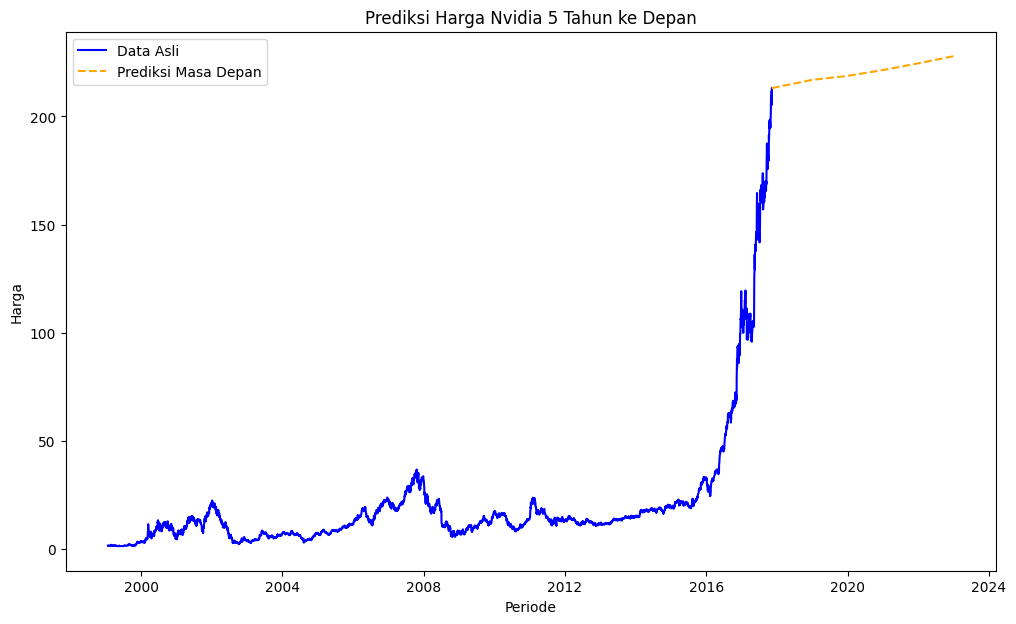

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load dataset
df = pd.read_csv('/content/dataset/Stocks/nvda.us.txt', delimiter=',')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Pilih fitur yang digunakan untuk prediksi
data = df[['Open']].values

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Membuat data sequence
sequence_length = 30  # Panjang sequence untuk LSTM
X, y = [], []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)

# Split data menjadi train dan test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data untuk LSTM (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Membangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluasi model
loss = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")

# Prediksi masa depan (5 periode ke depan)
future_predictions = []
last_sequence = X_test[-1]  # Gunakan sequence terakhir dari data test
for _ in range(5):  # Prediksi 5 periode
    next_step = model.predict(last_sequence.reshape(1, sequence_length, 1))
    future_predictions.append(next_step[0, 0])
    last_sequence = np.append(last_sequence[1:], next_step, axis=0)  # Update sequence

# Skala balik prediksi
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Gabungkan data asli dengan prediksi masa depan
extended_data = np.append(df['Open'].values, future_predictions)
future_dates = pd.date_range(start=df.index[-1], periods=len(future_predictions) + 1, freq='A')[1:]  # 'A' untuk tahunan
extended_index = np.append(df.index, future_dates)

# Visualisasi data asli dan prediksi masa depan
plt.figure(figsize=(12, 7))
plt.plot(extended_index[:len(df)], df['Open'], label="Data Asli", color="blue")
plt.plot(extended_index[len(df)-1:], extended_data[len(df)-1:], label="Prediksi Masa Depan", color="orange", linestyle="dashed")
plt.title('Prediksi Harga Nvidia 5 Tahun ke Depan')
plt.xlabel('Periode')
plt.ylabel('Harga')
plt.legend()
plt.show()